# Power loss computations with BIHC

- code: https://github.com/lsito/BIHC

- docs: https://bihc.readthedocs.io/en/latest/

- install: `pip install bihc`

- upgrade: `pip install bihc --upgrade`


In [1]:
# Importing modules
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import bihc

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [11]:
# LPC generated filling scheme file name
LPCfile ='25ns_2760b_2748_2494_2572_288bpi_13inj.csv' #fill 8828
Np = 1.63e11 #Intensity p/b
bl = 1.2e-9 #bunch length
fmax = 2.6790152140831e9 #from impedance file
      
# Defining beam object
beam = bihc.Beam(Np=Np, bunchLength=bl, LPCfile=LPCfile, bunchShape='GAUSSIAN', fmax=fmax) 

# Defining impedance
file = 'impedances/63wcase.txt'
Z = bihc.Impedance()
Z.getImpedanceFromCST(file)
Z.Zr = np.abs(Z.Zr)

# Compute power loss
power1b = beam.getPloss(Z)[0]
shifts, power1b_s = beam.getShiftedPloss(Z, shift=20e6)

Elaborating Data...


Computing scan: 100%|██████████| 3556/3556 [01:58<00:00, 30.07it/s]


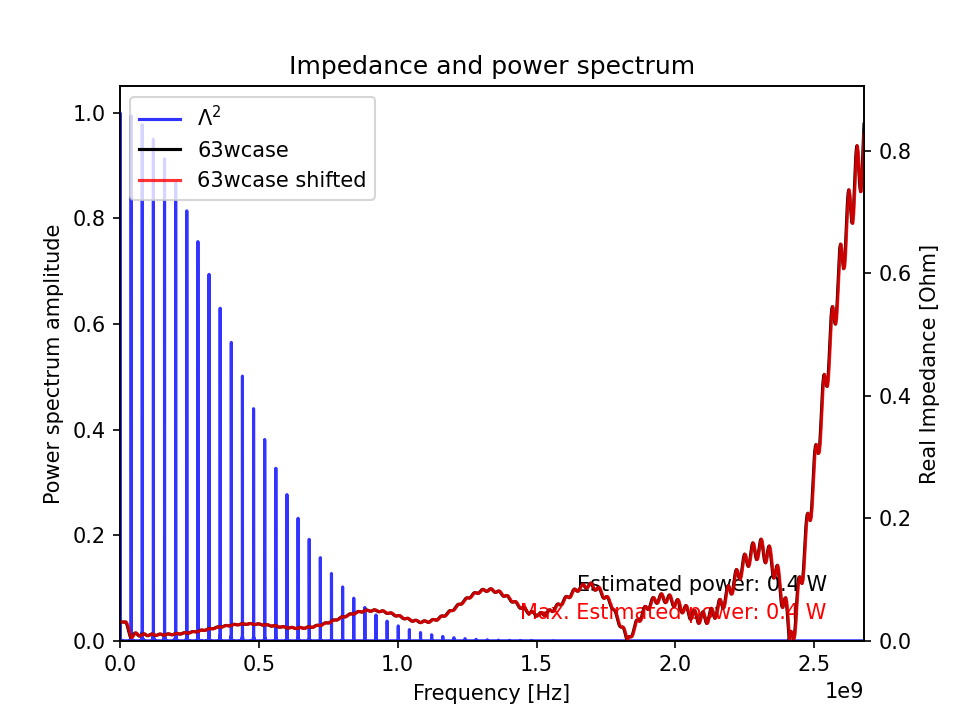

In [12]:
# Plot impedance and power spectrum
fig, ax = plt.subplots()

axx = ax.twinx()

l1, = ax.plot(beam.powerSpectrum[0], beam.powerSpectrum[1], color='b', alpha=0.8)
l2, = axx.plot(Z.f, Z.Zr, color='k')

# Shifted impedance curve
step = shifts[np.argmax(power1b_s)]
Zshifted = np.roll(Z.Zr, step)
if step > 0: Zshifted[:step] = Z.Zr[0]
l3, = axx.plot(Z.f, Zshifted, color='r', alpha=0.8)

ax.legend([l1, l2, l3], ['$\Lambda^2$', file.split('/')[1].split('.txt')[0], file.split('/')[1].split('.txt')[0]+' shifted'], loc=2)
ax.set_ylabel('Power spectrum amplitude')
axx.set_ylabel('Real Impedance [Ohm]')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim((0, fmax))
ax.set_ylim(ymin=0)
axx.set_ylim(ymin=0)
ax.set_title('Impedance and power spectrum')
ax.text(0.95, 0.1, f'Estimated power: {round(power1b,2)} W', ha='right', va='center', transform=ax.transAxes)
ax.text(0.95, 0.05, f'Max. Estimated power: {round(np.max(power1b_s),2)} W', c='r',ha='right', va='center', transform=ax.transAxes)
plt.show()

Computing 2-beam power: 100%|██████████| 5000/5000 [00:50<00:00, 98.49it/s] 


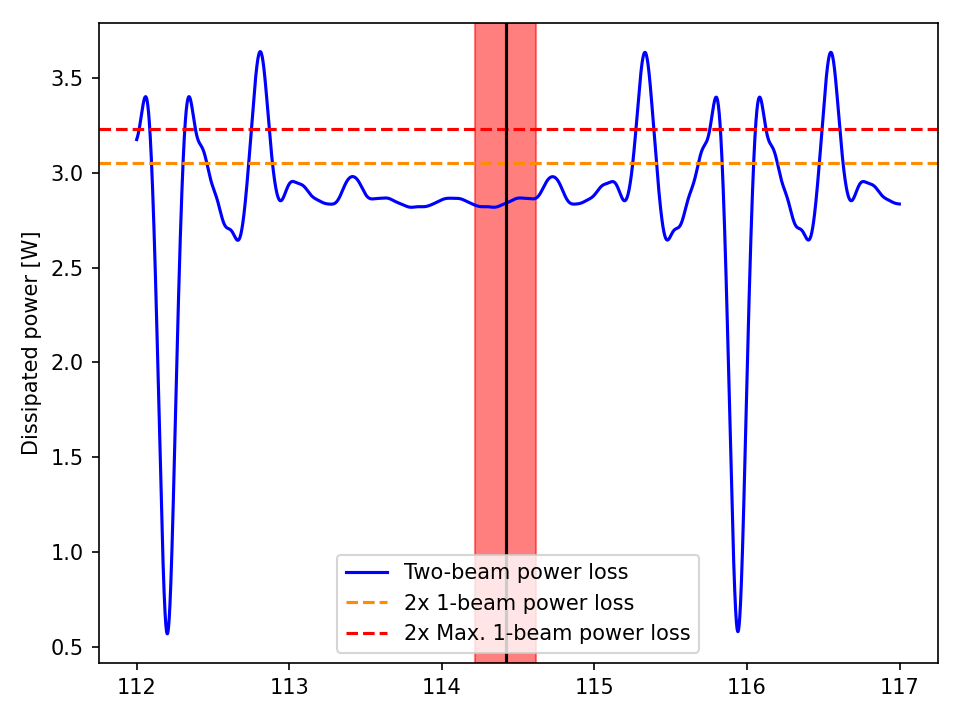

In [4]:
# Defining the phase shift array for LHC
c = 299792458 # Speed of light in vacuum [m/s]
ring_circumference =  26658.883   #[m]

start = 112 #m
stop = 117 #m
resolution = 0.001 #m 

s = np.arange(start, stop, resolution)
tau_s = 2*s/c # Phase shift array [s]

power2b = beam.get2BeamPloss(Z, tau_s=tau_s)

# Plot power los vs distance from IP
fig, ax = plt.subplots()

ax.plot(s, power2b, label="Two-beam power loss", c='b')
ax.axhline(power1b*2, label='2x 1-beam power loss', ls='--', color='darkorange')
ax.axhline(np.max(power1b_s)*2, label='2x Max. 1-beam power loss', ls='--', color='r')

#axs[0].set_xlabel('Distance from IP [m]')
ax.set_ylabel('Dissipated power [W]')
ax.legend()

# add module length
start_module5 = 26544.2632
end_module5 = 26544.6632

ax.axvspan(ring_circumference-start_module5, ring_circumference-end_module5, alpha=0.5, color='red')
ax.axvline(ring_circumference-start_module5+((ring_circumference-end_module5) - (ring_circumference-start_module5))/2, color='k')

plt.tight_layout()
plt.show()

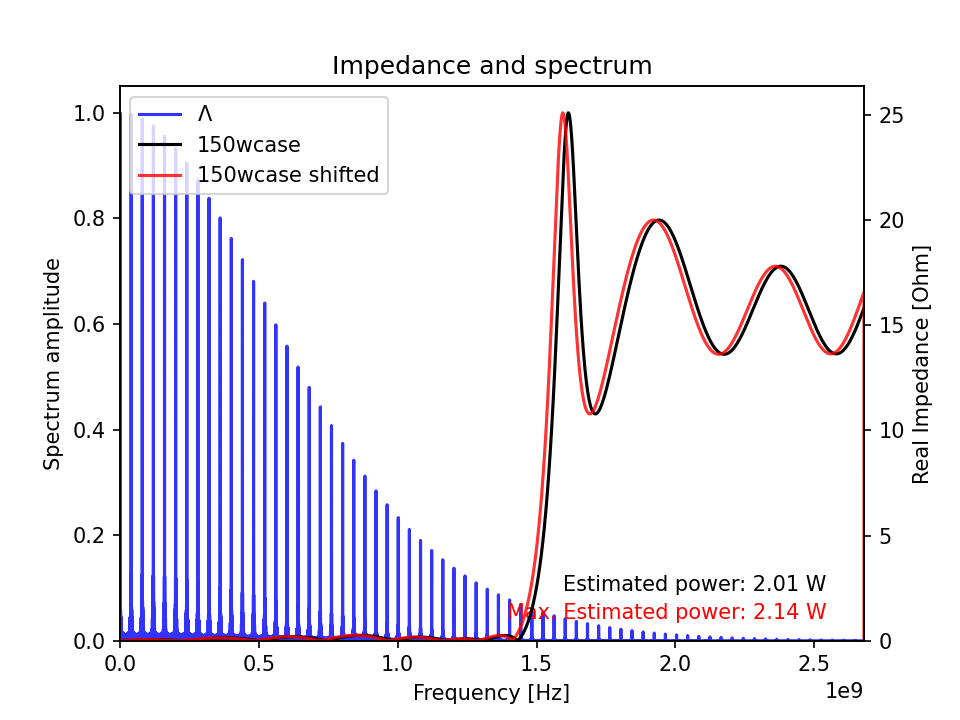

In [6]:
# Plot impedance and spectrum
fig, ax = plt.subplots()

axx = ax.twinx()

l1, = ax.plot(beam.spectrum[0], beam.spectrum[1], color='b', alpha=0.8)
l2, = axx.plot(Z.f, Z.Zr, color='k')

# Shifted impedance curve
step = shifts[np.argmax(power1b_s)]
Zshifted = np.roll(Z.Zr, step)
if step > 0: Zshifted[:step] = Z.Zr[0]
l3, = axx.plot(Z.f, Zshifted, color='r', alpha=0.8)

ax.legend([l1, l2, l3], ['$\Lambda$', file.split('/')[1].split('.txt')[0], file.split('/')[1].split('.txt')[0]+' shifted'], loc=2)
ax.set_ylabel('Spectrum amplitude')
axx.set_ylabel('Real Impedance [Ohm]')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim((0, fmax))
ax.set_ylim(ymin=0)
axx.set_ylim(ymin=0)
ax.set_title('Impedance and spectrum')
ax.text(0.95, 0.1, f'Estimated power: {round(power1b,2)} W', ha='right', va='center', transform=ax.transAxes)
ax.text(0.95, 0.05, f'Max. Estimated power: {round(np.max(power1b_s),2)} W', c='r',ha='right', va='center', transform=ax.transAxes)
plt.show()

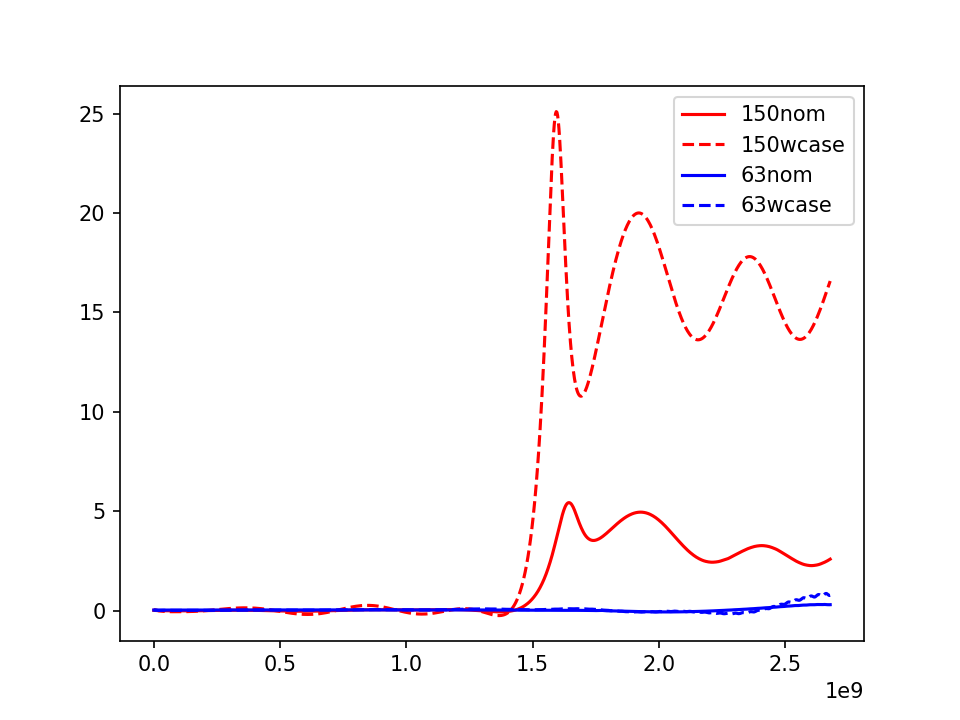

In [6]:
import glob

# Plot impedance curves
fig, ax = plt.subplots()

c = {0:'r', 1:'r', 2:'b', 3:'b'}
ls = {0:'-', 1:'--', 2:'-', 3:'--'}

for i, file in enumerate(sorted(glob.glob('impedances/*'))):

    # Defining impedance
    Z = bihc.Impedance()
    Z.getImpedanceFromCST(file)
    #Z.Zr = np.abs(Z.Zr)

    # Plot
    ax.plot(Z.f, Z.Zr, c=c[i], ls=ls[i], label=file.split('/')[1].split('.txt')[0])

ax.legend()
#ax.set_yscale('symlog')
plt.show()

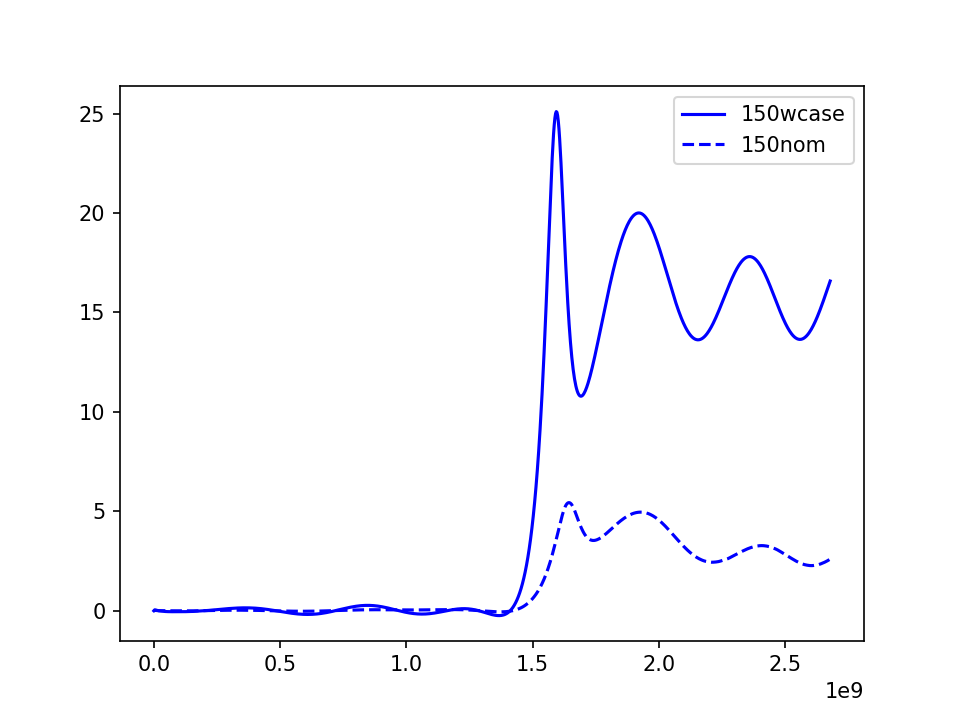

In [7]:
# Plot impedance curves
fig, ax = plt.subplots()

# Defining impedance
file = 'impedances/150wcase.txt'
Z = bihc.Impedance()
Z.getImpedanceFromCST(file)
#Z.Zr = np.abs(Z.Zr)
ax.plot(Z.f, Z.Zr, c='b', ls='-', label=file.split('/')[1].split('.txt')[0])

# Defining impedance
file = 'impedances/150nom.txt'
Z = bihc.Impedance()
Z.getImpedanceFromCST(file)
#Z.Zr = np.abs(Z.Zr)
ax.plot(Z.f, Z.Zr, c='b', ls='--', label=file.split('/')[1].split('.txt')[0])


ax.legend()
#ax.set_yscale('symlog')
plt.show()

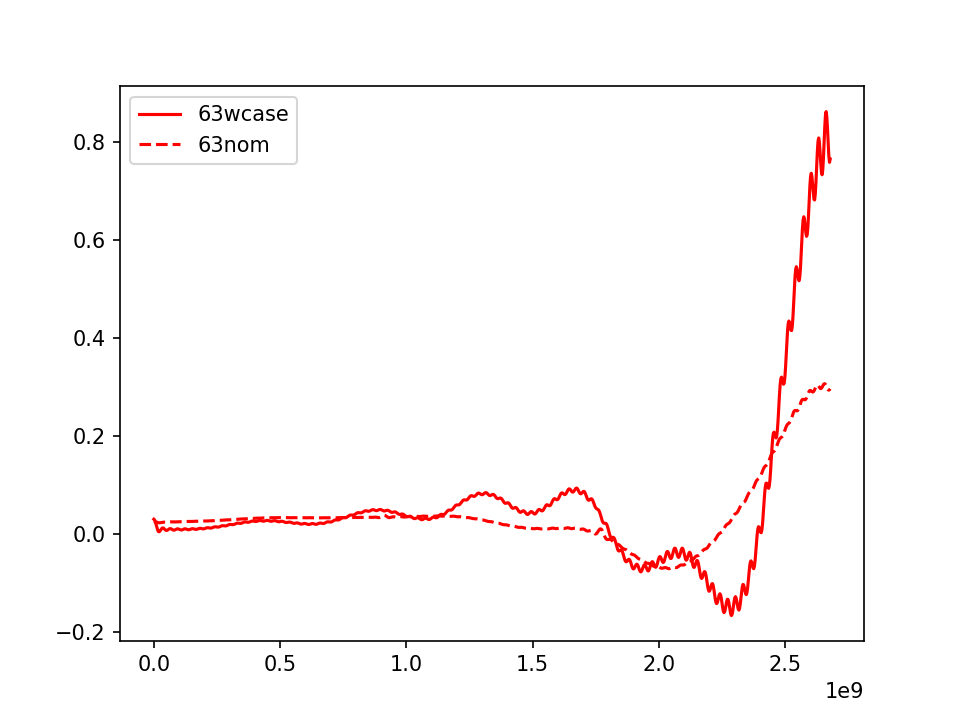

In [9]:
# Plot impedance curves
fig, ax = plt.subplots()

# Defining impedance
file = 'impedances/63wcase.txt'
Z = bihc.Impedance()
Z.getImpedanceFromCST(file)
#Z.Zr = np.abs(Z.Zr)
ax.plot(Z.f, Z.Zr, c='r', ls='-', label=file.split('/')[1].split('.txt')[0])

# Defining impedance
file = 'impedances/63nom.txt'
Z = bihc.Impedance()
Z.getImpedanceFromCST(file)
#Z.Zr = np.abs(Z.Zr)
ax.plot(Z.f, Z.Zr, c='r', ls='--', label=file.split('/')[1].split('.txt')[0])


ax.legend()
#ax.set_yscale('symlog')
plt.show()